In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [6]:
import seaborn as sns

In [7]:
df=pd.read_csv('train_data_amex.csv')
df

customer_id            name  age gender owns_car owns_house  \
0      CST_115179        ita Bose   46      F        N          Y   
1      CST_121920  Alper Jonathan   29      M        N          Y   
2      CST_109330     Umesh Desai   37      M        N          Y   
3      CST_128288             Rie   39      F        N          Y   
4      CST_151355          McCool   46      M        Y          Y   
...           ...             ...  ...    ...      ...        ...   
45523  CST_130421           Doris   55      F        N          N   
45524  CST_136670         Luciana   31      F        N          Y   
45525  CST_145435         Jessica   27      F        N          Y   
45526  CST_130913           Tessa   32      M        Y          N   
45527  CST_160078        Gopinath   38      M        N          Y   

       no_of_children  net_yearly_income  no_of_days_employed occupation_type  \
0                 0.0          107934.04                612.0         Unknown   
1                 0.0          109862.62               2771.0        Laborers   
2                 0.0          230153.17                204.0        Laborers   
3                 0.0          122325.82              11941.0      Core staff   
4                 0.0          387286.00               1459.0      Core staff   
...               ...                ...                  ...             ...   
45523             2.0           96207.57                117.0         Unknown   
45524             0.0          383476.74                966.0     Accountants   
45525             0.0          260052.18               1420.0      Core staff   
45526             0.0          157363.04               2457.0        Laborers   
45527             1.0          316896.28               1210.0         Unknown   

       total_family_members  migrant_worker  yearly_debt_payments  \
0                       1.0             1.0              33070.28   
1                       2.0             0.0              15329.53   
2                       2.0             0.0              48416.60   
3                       2.0             0.0              22574.36   
4                       1.0             0.0              38282.95   
...                     ...             ...                   ...   
45523                   4.0             0.0              11229.54   
45524                   2.0             1.0              43369.91   
45525                   2.0             0.0              22707.51   
45526                   2.0             0.0              20150.10   
45527                   3.0             0.0              34603.78   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
0          18690.93                    73         544.0              2   
1          37745.19                    52         857.0              0   
2          41598.36                    43         650.0              0   
3          32627.76                    20         754.0              0   
4          52950.64                    75         927.0              0   
...             ...                   ...           ...            ...   
45523      29663.83                    82         907.0              0   
45524     139947.16                    32         679.0              0   
45525      83961.83                    46         727.0              0   
45526      25538.72                    92         805.0              0   
45527      36630.76                    26         682.0              0   

       default_in_last_6months  credit_card_default  
0                            1                    1  
1                            0                    0  
2                            0                    0  
3                            0                    0  
4                            0                    0  
...                        ...                  ...  
45523                        0                    0  
45524                        0                    0  


In [8]:
df.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [39]:
df
x=df.iloc[:,0:18]
y=df.iloc[:,-1]
y

0        1
1        0
2        0
3        0
4        0
        ..
45523    0
45524    0
45525    0
45526    0
45527    0
Name: credit_card_default, Length: 45527, dtype: int64

In [41]:
print(df.isnull().sum())

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


In [43]:
df=df.dropna()

<Axes: xlabel='occupation_type', ylabel='count'>

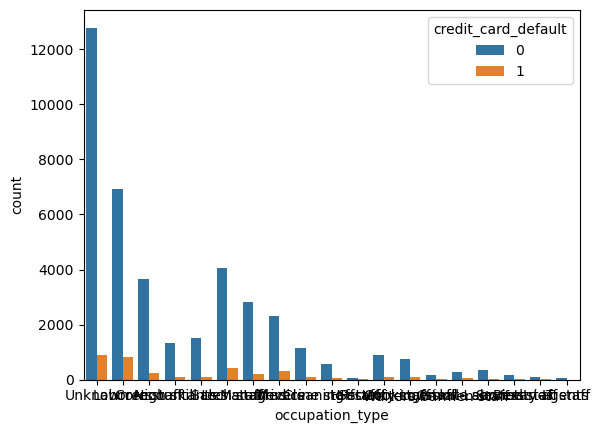

In [45]:
sns.countplot(data=df,x='occupation_type' ,hue='credit_card_default')


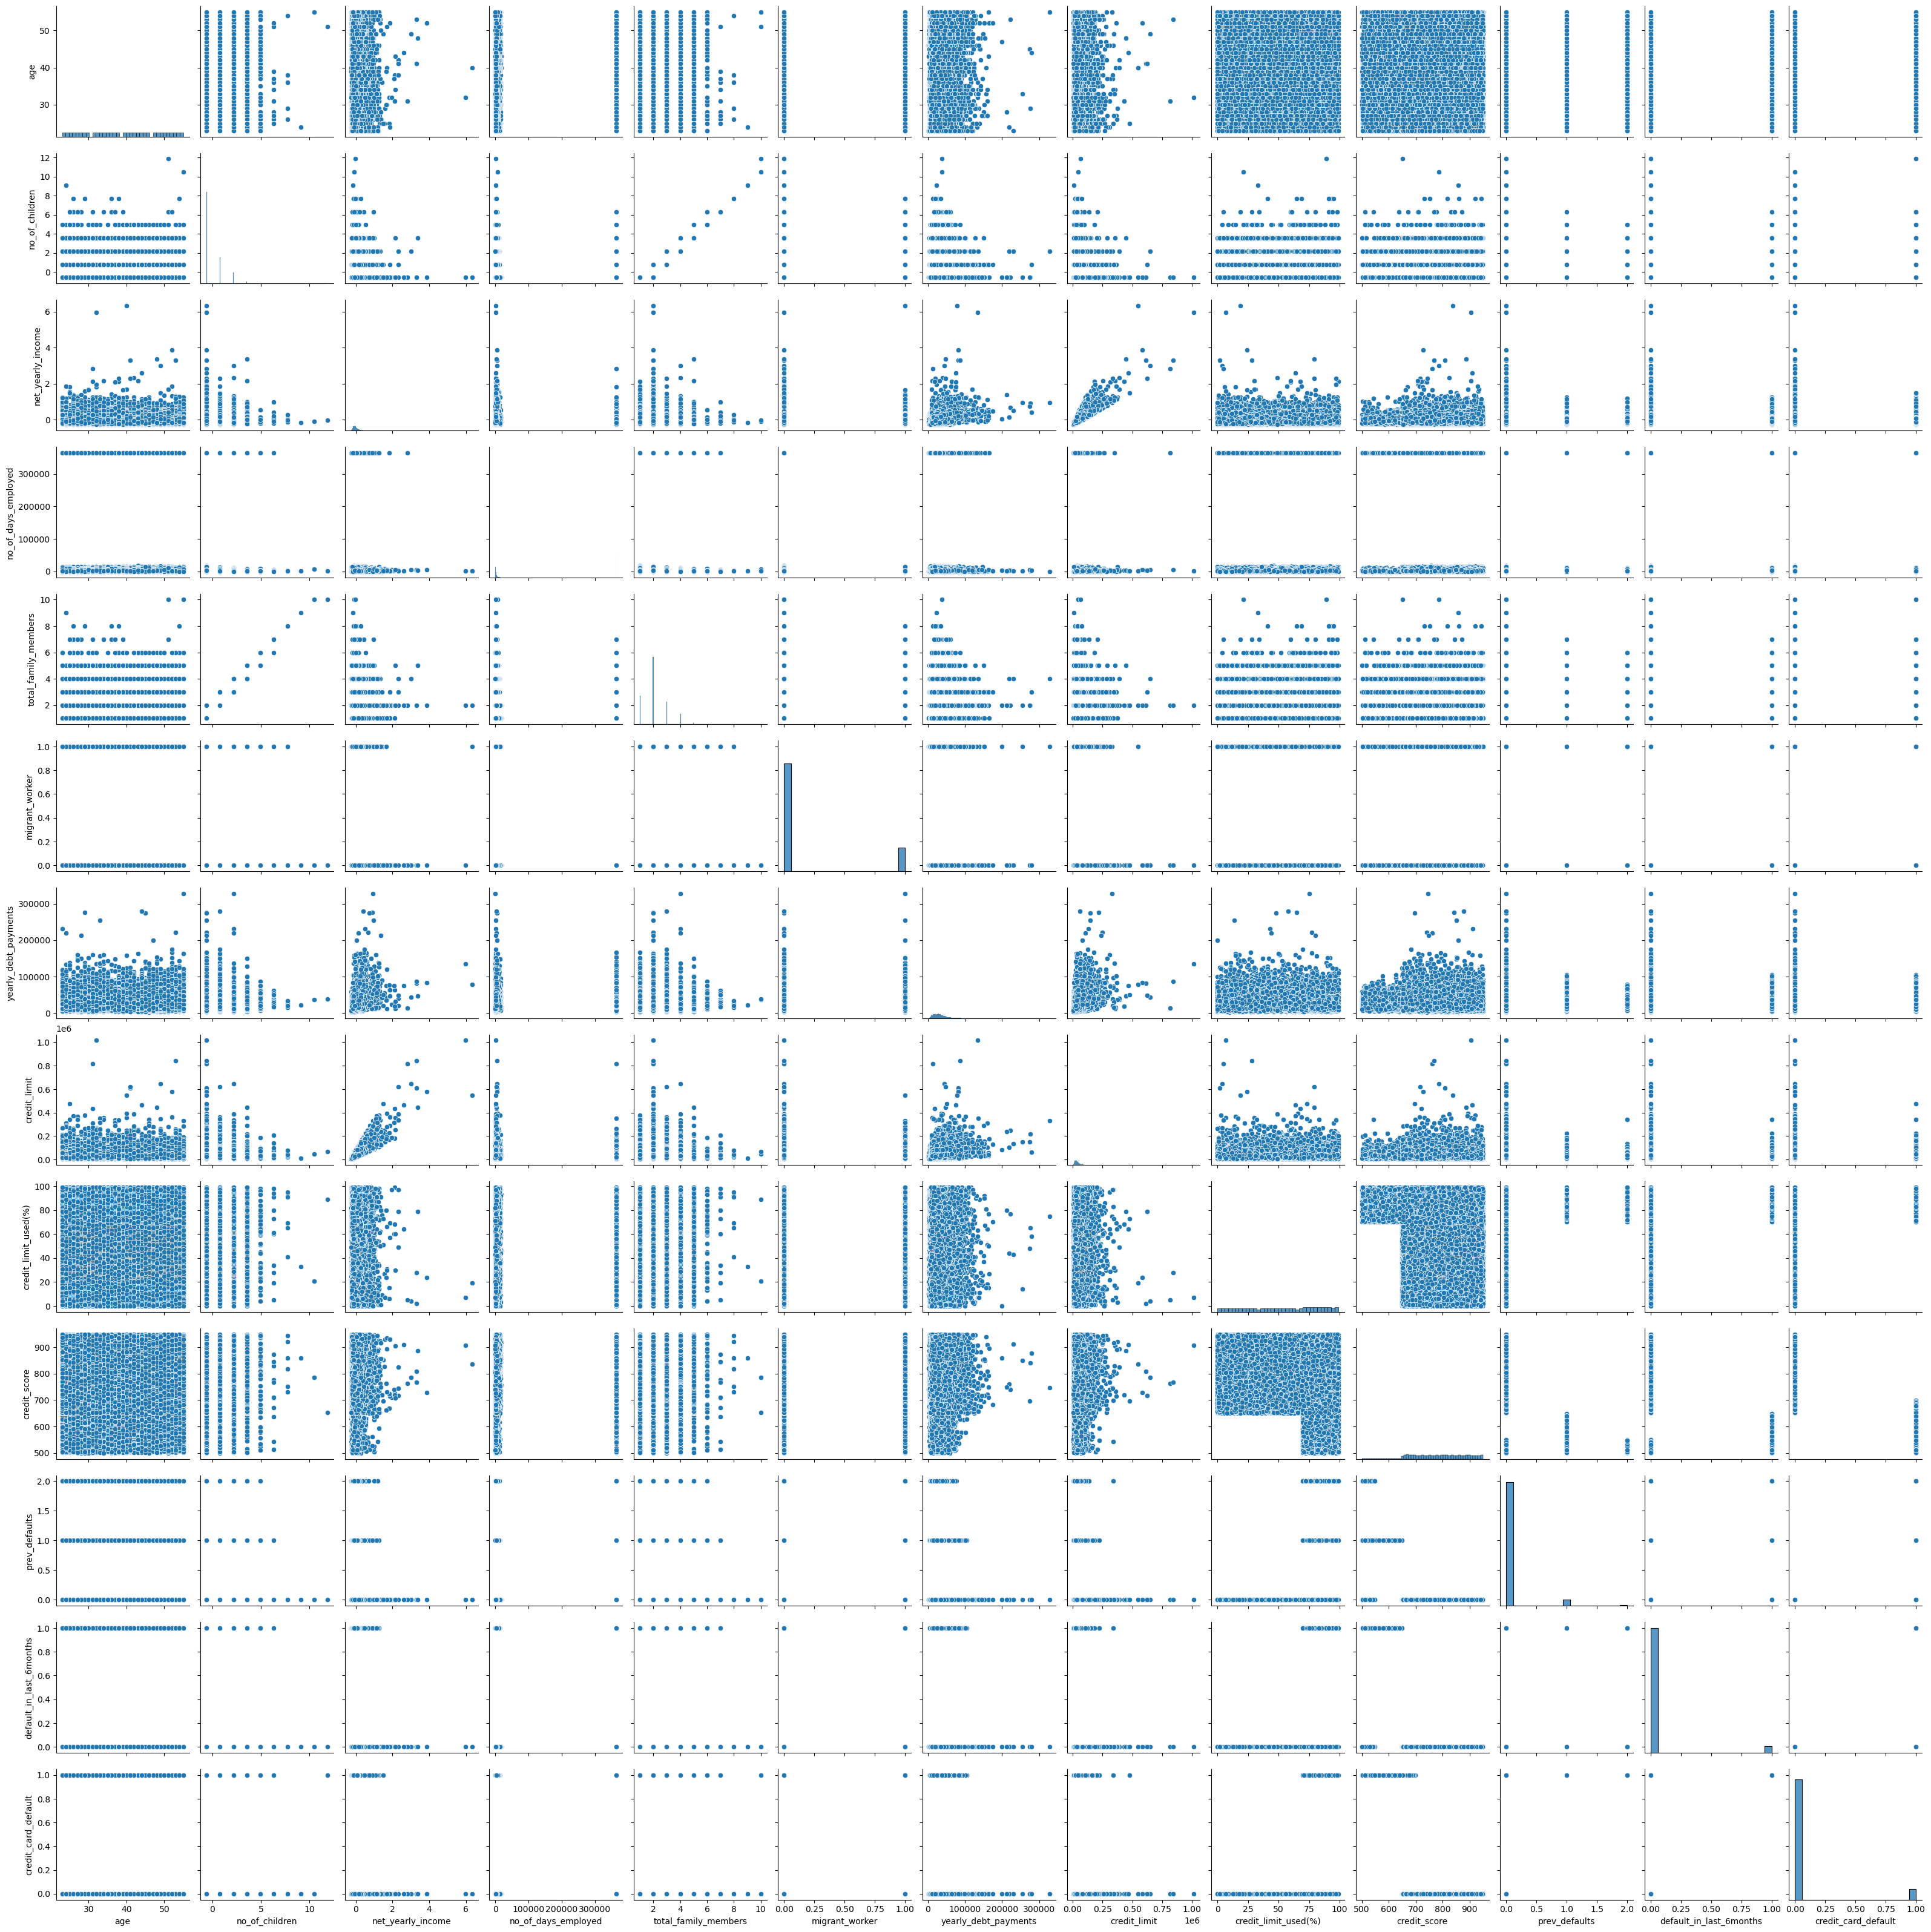

In [46]:
sns.pairplot(df)

<Axes: xlabel='total_family_members', ylabel='count'>

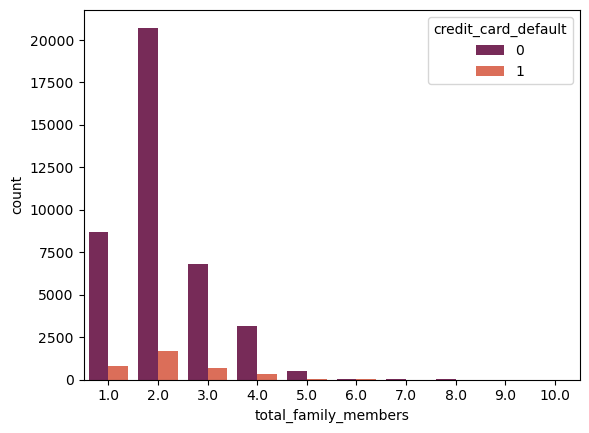

In [47]:
sns.countplot(data=df, x='total_family_members', hue='credit_card_default', palette='rocket')

In [119]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)
print(clf.coef_)  
print(clf.intercept_)

ValueError: could not convert string to float: 'CST_115179'

In [ ]:
sns.scatterplot(df,x='net_yearly_income',y='age')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,6:8])
x_scaled=scaler.transform(df.iloc[:,6:8])
x_scaled

In [117]:
df.iloc[:,6:8]=pd.DataFrame(x_scaled)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6056\2863788826.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.580944
1       -0.580944
2       -0.580944
3       -0.580944
4       -0.580944
           ...   
45523    2.181147
45524   -0.580944
45525   -0.580944
45526   -0.580944
45527    0.800102
Name: 0, Length: 45528, dtype: float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:,6:8]=pd.DataFrame(x_scaled)
C:\Users\Acer\AppData\Local\Temp\ipykernel_6056\2863788826.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.138583
1       -0.135701
2        0.044088
3       -0.117073
4        0.278941
           ...   
45523   -0.156110
45524    0.273248
45525    0.088775
45526   -0.064706
45527    0.173736
Name: 1, Length: 45528, dtype: float64' has dtype incompatible with f

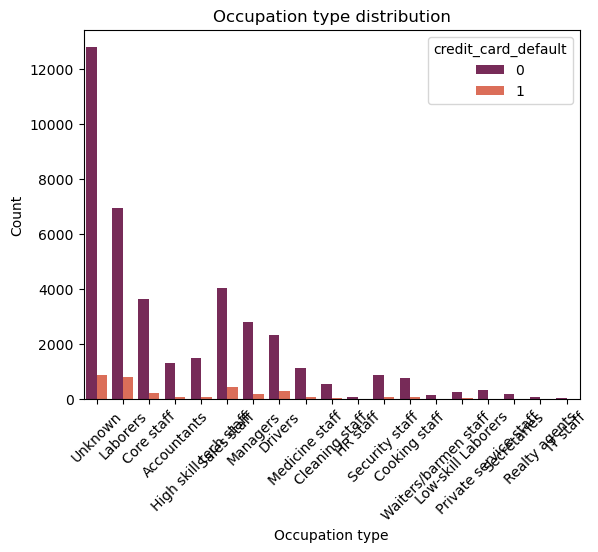

In [113]:
sns.countplot(data=df, x='occupation_type', hue='credit_card_default', palette='rocket')
plt.xlabel('Occupation type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Occupation type distribution')
plt.show()

<Axes: xlabel='net_yearly_income', ylabel='gender'>

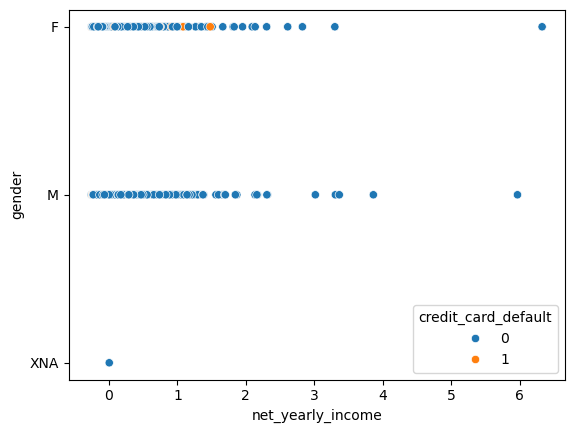

In [107]:
sns.scatterplot(df,x='net_yearly_income',y='gender', hue='credit_card_default')

In [ ]:
#df = df[~(df['net_yearly_income'] > 150)]
df = df.drop(df[df['net_yearly_income'] > 150].index)

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer([("norm1", OneHotEncoder(drop='first'), ['gender','owns_car','owns_house','occupation_type','customer_id','name'])])
X_trans = ct.fit_transform(x) 
X=pd.DataFrame(X_trans)
print(X)

                                                       0
0        (0, 4)\t1.0\n  (0, 21)\t1.0\n  (0, 10433)\t1...
1        (0, 0)\t1.0\n  (0, 4)\t1.0\n  (0, 12)\t1.0\n...
2        (0, 0)\t1.0\n  (0, 4)\t1.0\n  (0, 12)\t1.0\n...
3        (0, 4)\t1.0\n  (0, 7)\t1.0\n  (0, 19512)\t1....
4        (0, 0)\t1.0\n  (0, 2)\t1.0\n  (0, 4)\t1.0\n ...
...                                                  ...
45522    (0, 21)\t1.0\n  (0, 20981)\t1.0\n  (0, 46481...
45523    (0, 4)\t1.0\n  (0, 25382)\t1.0\n  (0, 47637)...
45524    (0, 4)\t1.0\n  (0, 7)\t1.0\n  (0, 31422)\t1....
45525    (0, 0)\t1.0\n  (0, 2)\t1.0\n  (0, 12)\t1.0\n...
45526    (0, 0)\t1.0\n  (0, 4)\t1.0\n  (0, 21)\t1.0\n...

[45527 rows x 1 columns]


In [156]:
from sklearn.linear_model import Lasso
alpha=[0,0.0001,0.001,0.01,0.1,1,10]

coeff_=[]

for i in alpha:
    reg= Lasso(alpha=i)
    reg.fit(X_trans,y)
    coeff_.append(reg.coef_.tolist())  
    
print(coeff_)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)


[[0.033185181253892415, -0.06976846319447673, -0.02130955538893688, -0.004883006482285578, -7.227184990511855e-05, 0.027568177996784977, 0.03920035222103801, -0.01760267714272783, 0.023986503832611795, 0.017819531565458666, -0.01693926417155239, -0.06015884216074622, 0.020612460398932563, 0.06422034947462332, -0.0097232654969929, 0.008600088414514583, 0.006625157923509333, 0.03007531687781871, 0.028966863290746582, -0.025355142811187843, 0.01879947639495134, -0.01159861697524104, 0.03143887397999243, -0.05589820032826376, -0.10595375775361485, -0.09409442845943441, -0.08888066788661593, -0.1273251827403275, -0.05214794895027983, -0.07513739283708208, -0.061830928119942424, -0.05579453931258822, -0.09409807446657073, -0.10943670937872717, -0.09386798993064126, -0.09412441599319456, -0.05595828722173616, -0.08095454368016547, -0.10252042946506983, -0.06194487607932569, -0.10919930914869562, -0.1007392768511394, 0.8872819746146342, -0.12724454465218263, -0.07379655519277456, -0.1272700817

In [161]:
input_array=np.array(coeff_)
coeff_df=pd.DataFrame(input_array)
coeff_df['alpha']=alpha
coeff_df.set_index('alpha')

0         1         2         3         4         5         6      \
alpha                                                                           
0.0000   0.033185 -0.069768 -0.021310 -0.004883 -0.000072  0.027568  0.039200   
0.0001   0.033784 -0.000000 -0.023534 -0.000000  0.000000  0.023282  0.036161   
0.0010   0.031375 -0.000000 -0.018261 -0.000000  0.000000  0.000000  0.000000   
0.0100   0.000000 -0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   
0.1000   0.000000 -0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   
1.0000   0.000000 -0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   
10.0000  0.000000 -0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   

            7         8        9      ...    49548     49549    49550  \
alpha                                 ...                               
0.0000  -0.017603  0.023987  0.01782  ...  0.00012  0.000423  0.00021   
0.0001  -0.012748  0.024980  0.00000  ...  0.00000  0.000000 -0.00000   
0.0010  -0.010168  0.002435  0.00000  ...  0.00000  0.000000 -0.00000   
0.0100  -0.000000  0.000000  0.00000  ...  0.00000  0.000000 -0.00000   
0.1000  -0.000000  0.000000  0.00000  ...  0.00000  0.000000 -0.00000   
1.0000  -0.000000  0.000000  0.00000  ...  0.00000  0.000000 -0.00000   
10.0000 -0.000000  0.000000  0.00000  ...  0.00000  0.000000 -0.00000   

           49551     49552     49553     49554     49555     49556     49557  
alpha                                                                         
0.0000   0.00047  0.000298 -0.000078 -0.000249  0.000212 -0.000062  0.000252  
0.0001  -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  
0.0010  -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  
0.0100  -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  
0.1000  -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  
1.0000  -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  
10.0000 -0.00000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000  

[7 rows x 49558 columns]

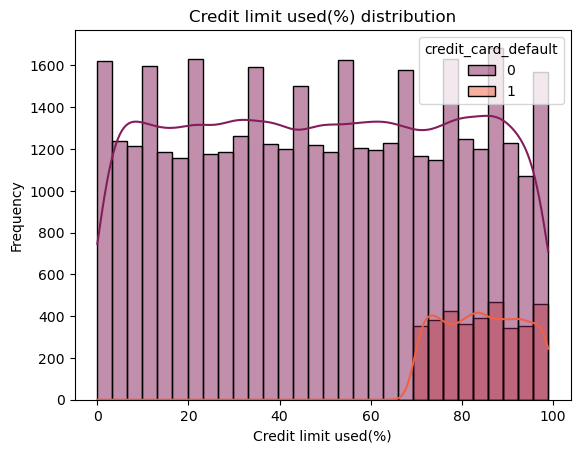

In [139]:
sns.histplot(data=df, kde=True, x='credit_limit_used(%)', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Credit limit used(%)')
plt.ylabel('Frequency')
plt.title('Credit limit used(%) distribution')
plt.show()